# Taphonomic Classifier for Human Bone

This is a demo of an interface for working with a tensorflow classifier trained on images of various taphonomic processes visible on human remains. Upload your image, then click the button.

In [5]:
from IPython.display import Image, display
from ipywidgets import widgets
from ipywidgets import FileUpload
test_image = FileUpload()
display(test_image)

FileUpload(value={}, description='Upload')

-------

Button(description='Classify the taphonomic process', style=ButtonStyle())

Ignore the warnings


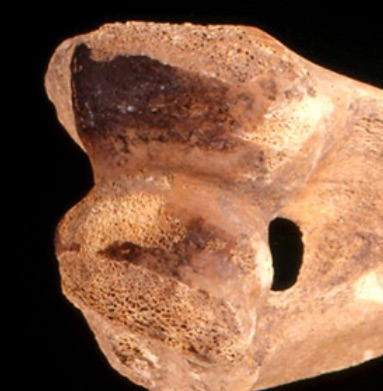

2021-02-20 22:44:55.332804: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-02-20 22:44:55.338870: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2294685000 Hz
2021-02-20 22:44:55.339339: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5637bffa60d0 executing computations on platform Host. Devices:
2021-02-20 22:44:55.339381: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2021-02-20 22:44:55.346652: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) 

In [6]:

button = widgets.Button(description="Classify the taphonomic process")
display(button)
def on_button_clicked(b):
    uploaded_filename = next(iter(test_image.value))
    content = test_image.value[uploaded_filename]['content']
    with open('myfile.jpg', 'wb') as f: f.write(content)
    display(Image(filename='myfile.jpg')) 
    
    !python -W ignore -m scripts.label_image \
    --graph=data/retrained_graph.pb  \
    --labels=data/retrained_labels.txt \
    --image=myfile.jpg
   
    
button.on_click(on_button_clicked)
print("Ignore the warnings")

Classifier is trained using the Tensorflow for Poets tutorial; this app was made by carefully studying the work of Tim Sherratt and the GLAM Workbench, by Shawn Graham